# ABS Bi-annual Average Weekly Earnings 6302.ipynb

## Python set-up

In [1]:
# analytic imports
import pandas as pd
import readabs as ra
from readabs import recalibrate
from readabs import metacol as mc

# local imports
from abs_helper import get_abs_data
from mgplot import seastrend_plot_finalise, multi_start, line_plot_finalise

# pandas display settings
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

# display charts in this notebook
SHOW = False

In [2]:
abs_dict, meta, source, RECENT = get_abs_data("6302.0")

Table 63020do015_20252 has no 'Index' sheet.
Table 63020do016_20252 has no 'Index' sheet.
Table 63020do017_20252 has no 'Index' sheet.


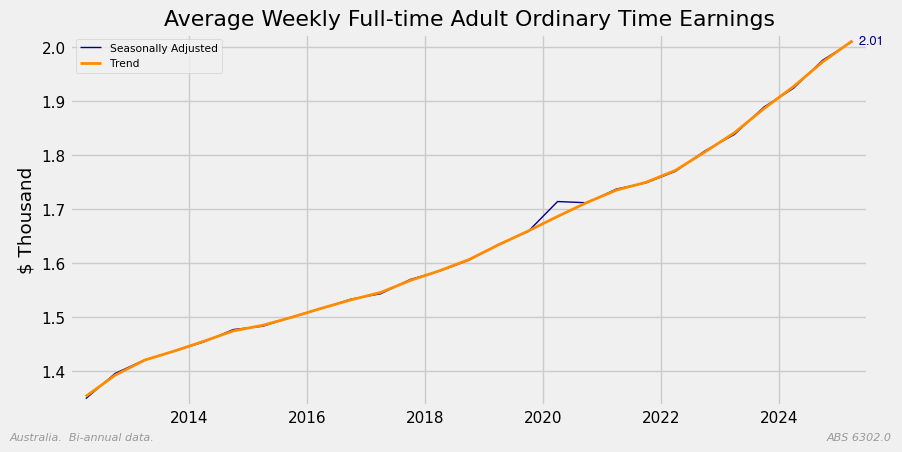

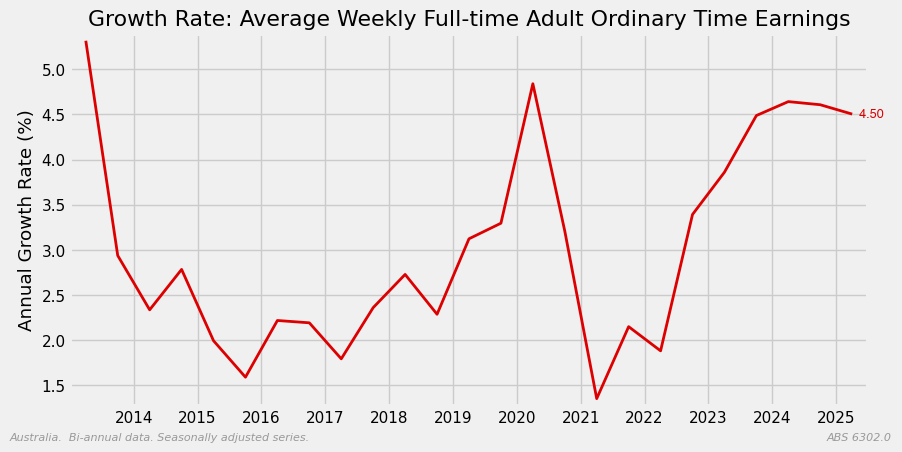

In [3]:
data = pd.DataFrame()
for stype, table in zip(("Seasonally Adjusted", "Trend"), ("6302002", "6302001")):
    selection = {
        "Earnings": mc.did,
        "Persons": mc.did,
        "Full Time": mc.did,
        "Adult": mc.did,
        "Ordinary time earnings": mc.did,
        stype: mc.stype,
        "$": mc.unit,
        table: mc.table,
    }
    _table, series_id, units = ra.find_abs_id(meta, selection, verbose=False)
    series = abs_dict[table][series_id]
    series.name = stype
    data[stype] = series

data, units = recalibrate(data, "$")
seastrend_plot_finalise(
    data,
    title="Average Weekly Full-time Adult Ordinary Time Earnings",
    ylabel=units,
    lfooter="Australia.  Bi-annual data. ",
    rfooter="ABS 6302.0",
    show=True,
)
growth = data[data.columns[0]].pct_change(2) * 100
line_plot_finalise(
    growth,
    title="Growth Rate: Average Weekly Full-time Adult Ordinary Time Earnings",
    ylabel="Annual Growth Rate (%)",
    lfooter="Australia.  Bi-annual data. Seasonally adjusted series. ",
    rfooter="ABS 6302.0",
    annotate=True,
    show=True,
)

## Finished

In [4]:
# watermark
%load_ext watermark
%watermark -u -t -d --iversions --watermark --machine --python --conda
print("Finished")

Last updated: 2025-10-20 07:31:13

Python implementation: CPython
Python version       : 3.13.8
IPython version      : 9.4.0

conda environment: n/a

Compiler    : Clang 20.1.4 
OS          : Darwin
Release     : 25.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

readabs: 0.1.4
mgplot : 0.2.12
pandas : 2.3.1

Watermark: 2.5.0

Finished
